In [2]:
!pip install matplotlib==3.10.3 seaborn==0.13.2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\gbort\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [ ]:
# A function to reset matplotlib's runtime configuration parameters (rcParams) to their default values
mpl.rcParams.update(mpl.rcParamsDefault)

In [8]:
df = pd.read_csv('top500_transformed.csv', index_col=0)

In [6]:
df.head()

,title,year,duration,rating_value,rating_count,critic_rating_value,critic_count,directors,screenwriters,production_countries,...,boxoffice_outside_usa,budget,genres,duration_minutes,world_premiere_parsed,polish_premiere_parsed,boxoffice_in$,boxoffice_usa_in$,boxoffice_outside_usa_in$,budget_in$
position,,,,,,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,1994,2h 22m,"8,8",955674,"8,2",91,['Frank Darabont'],['Frank Darabont'],['USA'],...,$117 315,$25 000 000,['Dramat'],142,1994-09-10,1995-04-16,28884504.0,28767189.0,117315.0,25000000.0
2,The Green Mile,1999,3h 8m,"8,6",1030633,"7,2",73,['Frank Darabont'],['Frank Darabont'],['USA'],...,$150 000 000,$60 000 000,['Dramat'],188,1999-12-06,2000-03-24,286801374.0,136801374.0,150000000.0,60000000.0
3,Intouchables,2011,1h 52m,"8,6",703261,"7,1",86,"['Olivier Nakache', 'Éric Toledano']","['Olivier Nakache', 'Éric Toledano']",['Francja'],...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
4,The Godfather,1972,2h 55m,"8,6",566582,"9,1",87,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']",['USA'],...,$113 960 743,$6 000 000,"['Dramat', 'Gangsterski']",175,1972-03-14,1972-12-31,250341816.0,136381073.0,113960743.0,6000000.0
5,12 Angry Men,1957,1h 36m,"8,7",236509,"8,9",86,['Sidney Lumet'],['Reginald Rose'],['USA'],...,NaN,NaN,['Dramat sądowy'],96,1957-04-10,1959-11-01,337000.0,NaN,NaN,NaN


In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['year', 'rating_count', 'critic_count', 'duration_minutes',
       'boxoffice_in$', 'boxoffice_usa_in$', 'boxoffice_outside_usa_in$',
       'budget_in$'],
      dtype='object')


Changing ```rating_value``` and ```critic_rating_value``` types to numeric

In [9]:
df['rating_value'] = df['rating_value'].str.replace(',', '.')
df['rating_value'] = pd.to_numeric(df['rating_value'], errors='coerce')

df['critic_rating_value'] = df['critic_rating_value'].str.replace(',', '.')
df['critic_rating_value'] = pd.to_numeric(df['critic_rating_value'], errors='coerce')

In [16]:
df.head()

,title,year,duration,rating_value,rating_count,critic_rating_value,critic_count,directors,screenwriters,production_countries,...,boxoffice_outside_usa,budget,genres,duration_minutes,world_premiere_parsed,polish_premiere_parsed,boxoffice_in$,boxoffice_usa_in$,boxoffice_outside_usa_in$,budget_in$
position,,,,,,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,1994,2h 22m,8.8,955674,8.2,91,['Frank Darabont'],['Frank Darabont'],['USA'],...,$117 315,$25 000 000,['Dramat'],142,1994-09-10,1995-04-16,28884504.0,28767189.0,117315.0,25000000.0
2,The Green Mile,1999,3h 8m,8.6,1030633,7.2,73,['Frank Darabont'],['Frank Darabont'],['USA'],...,$150 000 000,$60 000 000,['Dramat'],188,1999-12-06,2000-03-24,286801374.0,136801374.0,150000000.0,60000000.0
3,Intouchables,2011,1h 52m,8.6,703261,7.1,86,"['Olivier Nakache', 'Éric Toledano']","['Olivier Nakache', 'Éric Toledano']",['Francja'],...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
4,The Godfather,1972,2h 55m,8.6,566582,9.1,87,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']",['USA'],...,$113 960 743,$6 000 000,"['Dramat', 'Gangsterski']",175,1972-03-14,1972-12-31,250341816.0,136381073.0,113960743.0,6000000.0
5,12 Angry Men,1957,1h 36m,8.7,236509,8.9,86,['Sidney Lumet'],['Reginald Rose'],['USA'],...,NaN,NaN,['Dramat sądowy'],96,1957-04-10,1959-11-01,337000.0,NaN,NaN,NaN


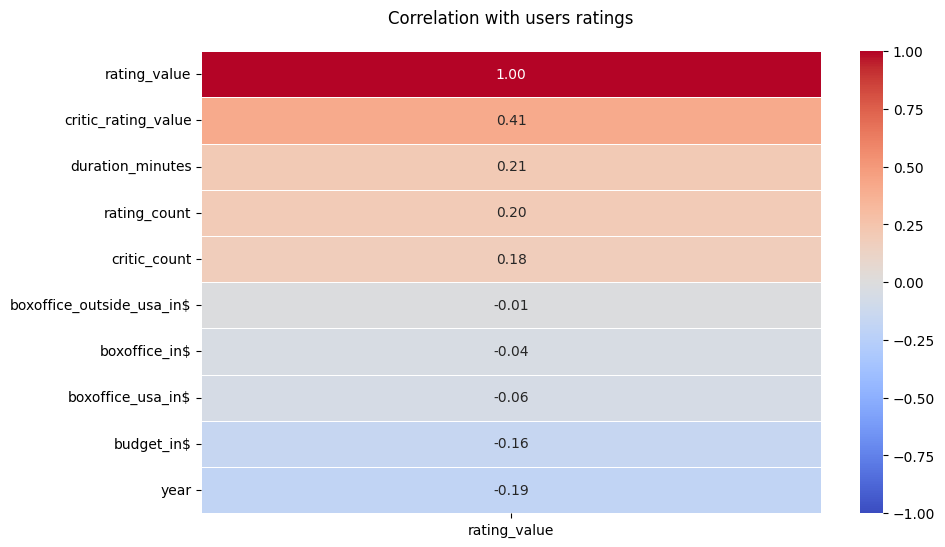

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_df = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_df[['rating_value']].sort_values(by='rating_value', ascending=False),
    annot=True, 
    cmap='coolwarm',
    vmin=-1, 
    vmax=1,
    center=0,
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation with users ratings', pad=20)
plt.show()

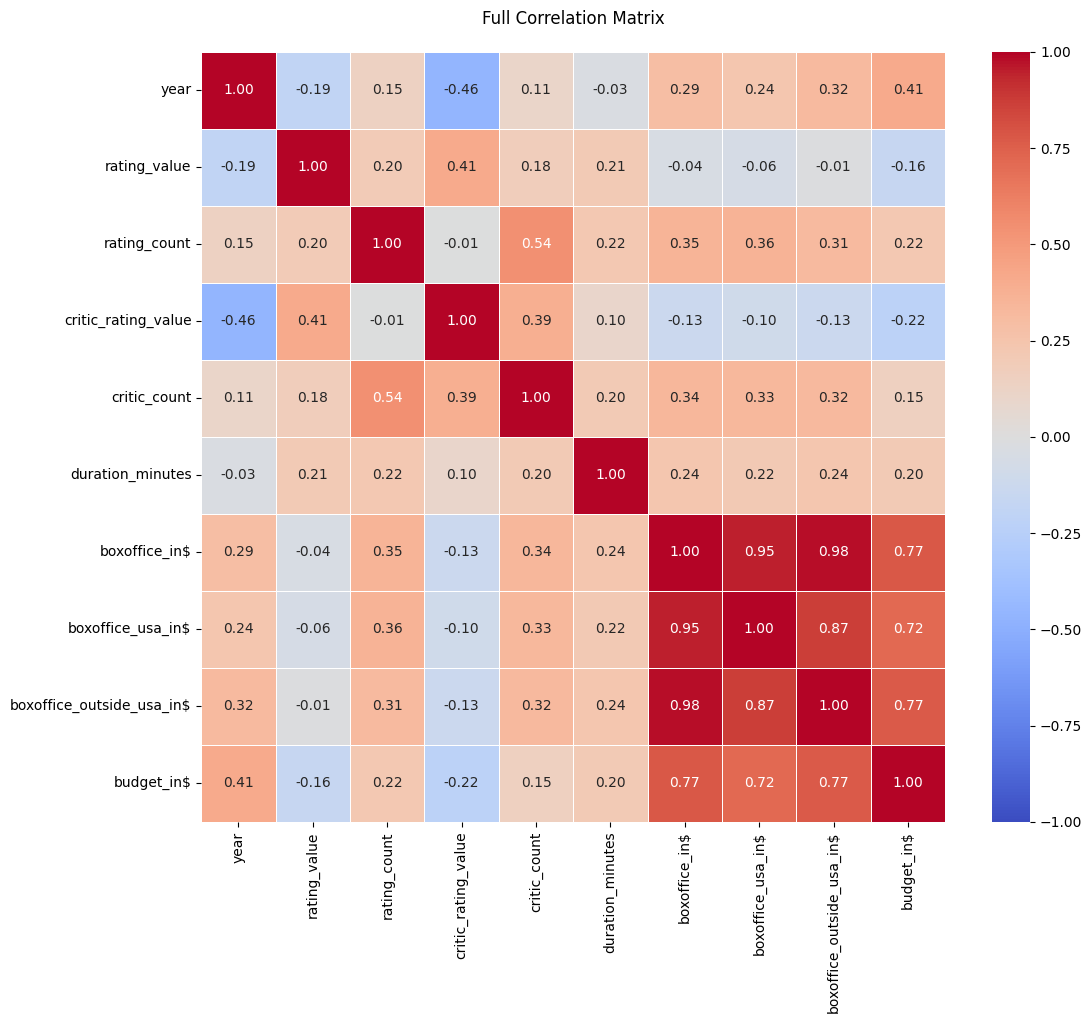

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Full Correlation Matrix', pad=20)
plt.show()

In [12]:
df['final_score'] = (df['rating_value'] + df['critic_rating_value']) / 2

df[['title','rating_value','critic_rating_value','final_score']].head()

,title,rating_value,critic_rating_value,final_score
position,,,,
1,The Shawshank Redemption,8.8,8.2,8.50
2,The Green Mile,8.6,7.2,7.90
3,Intouchables,8.6,7.1,7.85
4,The Godfather,8.6,9.1,8.85
5,12 Angry Men,8.7,8.9,8.80


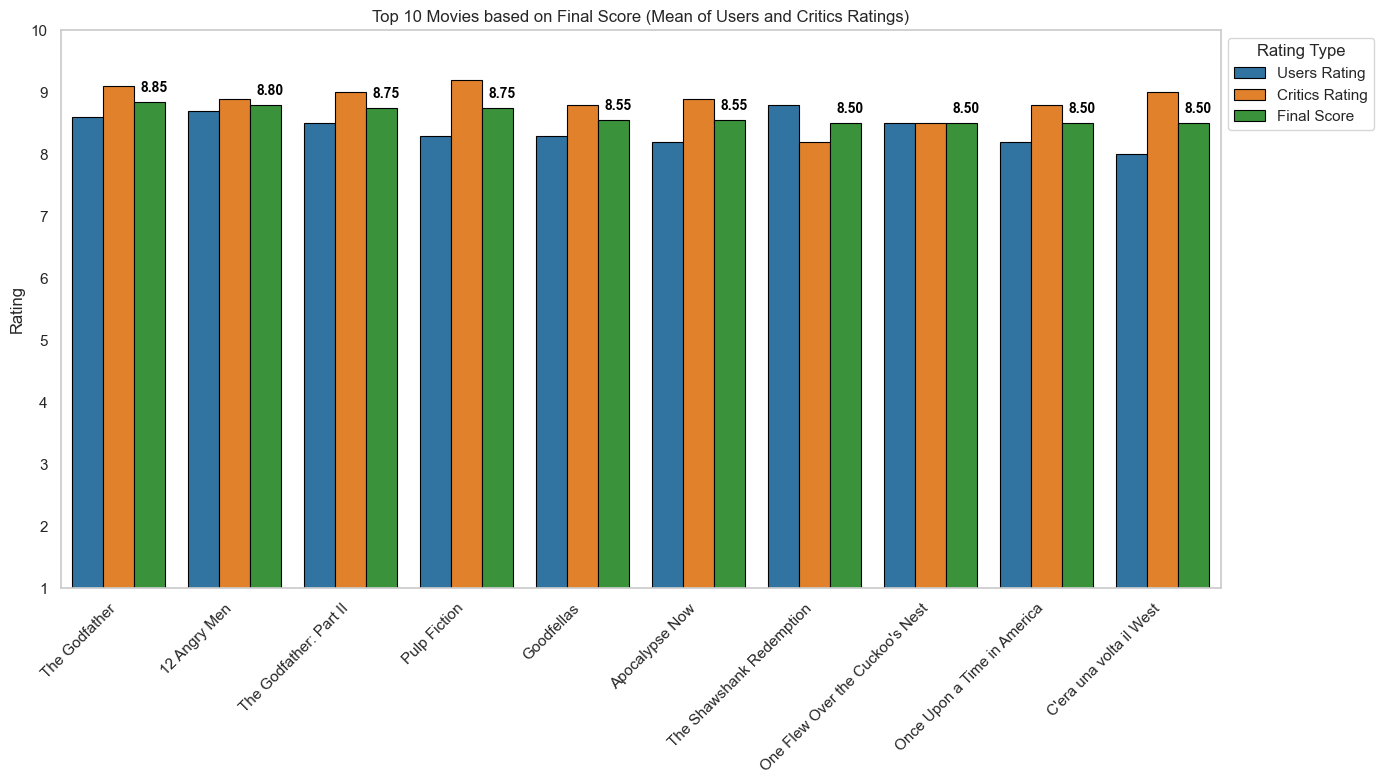

In [19]:
top10 = df.nlargest(10, 'final_score')
plot_df = top10[['title', 'rating_value', 'critic_rating_value', 'final_score']].melt(
    id_vars='title',
    var_name='rating_type',
    value_name='rating'
)

label_map = {
    'rating_value': 'Users Rating',
    'critic_rating_value': 'Critics Rating',
    'final_score': 'Final Score'
}
plot_df['rating_type'] = plot_df['rating_type'].map(label_map)


palette = {
    'Users Rating': '#1f77b4',  
    'Critics Rating': '#ff7f0e', 
    'Final Score': '#2ca02c'      
}

plt.figure(figsize=(14, 8))

ax = sns.barplot(
    data=plot_df,
    x='title',
    y='rating',
    hue='rating_type',
    palette=palette,
    edgecolor='black',
    linewidth=0.8
)
ax.grid(False)
ax.set_ylim(1, 10)

plt.xticks(rotation=45, ha='right')

plt.title('Top 10 Movies based on Final Score (Mean of Users and Critics Ratings)')
plt.xlabel('')
plt.ylabel('Rating')


leg = plt.legend(title='Rating Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Annotate final_score bars with values
for bar, rating_type in zip(ax.patches, plot_df['rating_type']):
    if rating_type == 'Final Score':
        height = bar.get_height()
        ax.annotate(
            f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(3, 5),  # offset label slightly right and above the bar
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            color='black'  # set text color to black
        )

plt.savefig('top10_finalscore.png', dpi=300, bbox_inches='tight')
plt.show()

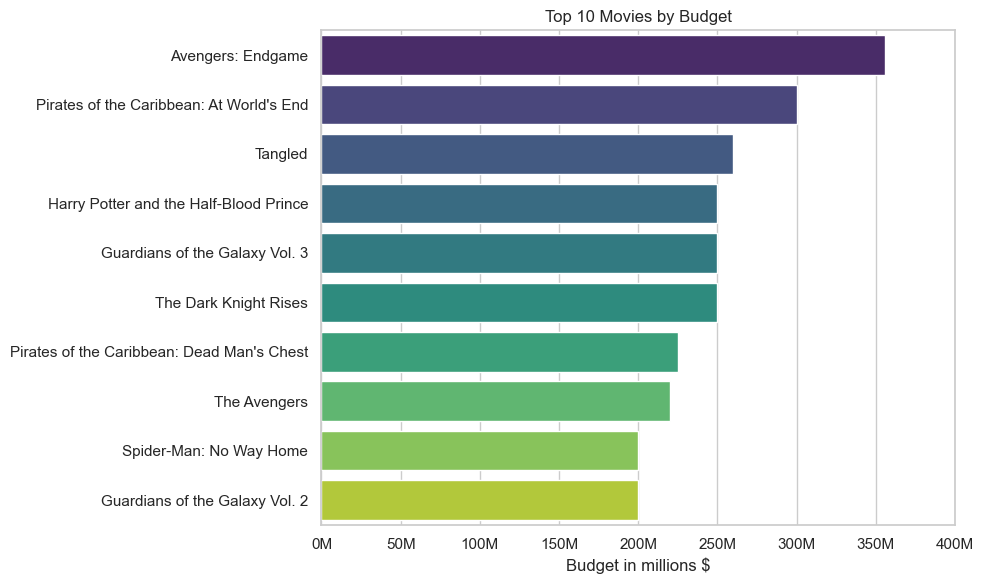

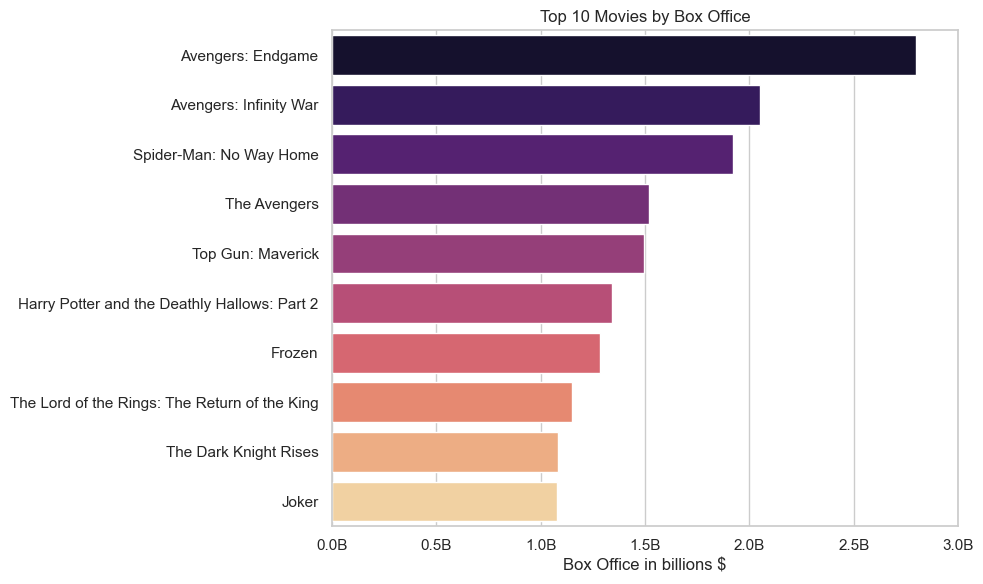

In [20]:
top10_budget = df.sort_values(by='budget_in$', ascending=False).head(10)
top10_boxoffice = df.sort_values(by='boxoffice_in$', ascending=False).head(10)

sns.set_theme(style="whitegrid")

# Budget chart
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='budget_in$', y='title', hue='title', data=top10_budget, palette='viridis', legend=False)

ticks = ax2.get_xticks()
new_ticks = [tick for tick in ticks if tick >= 0]
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{int(tick/1_000_000)}M' for tick in new_ticks])
ax2.set_xlabel('Budget in millions $')
ax2.set_ylabel('')

plt.title('Top 10 Movies by Budget')
plt.tight_layout()
plt.savefig('top10_budget.png', dpi=300, bbox_inches='tight')
plt.show()

# Box office chart
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='boxoffice_in$', y='title', hue='title', data=top10_boxoffice, palette='magma', legend=False)

ticks2 = ax3.get_xticks()
new_ticks2 = [tick for tick in ticks2 if tick >= 0]
ax3.set_xticks(new_ticks2)
ax3.set_xticklabels([f'{tick/1_000_000_000:.1f}B' for tick in new_ticks2])
ax3.set_xlabel('Box Office in billions $')
ax3.set_ylabel('')

plt.title('Top 10 Movies by Box Office')
plt.tight_layout()
plt.savefig('top10_boxoffice.png', dpi=300, bbox_inches='tight')
plt.show()


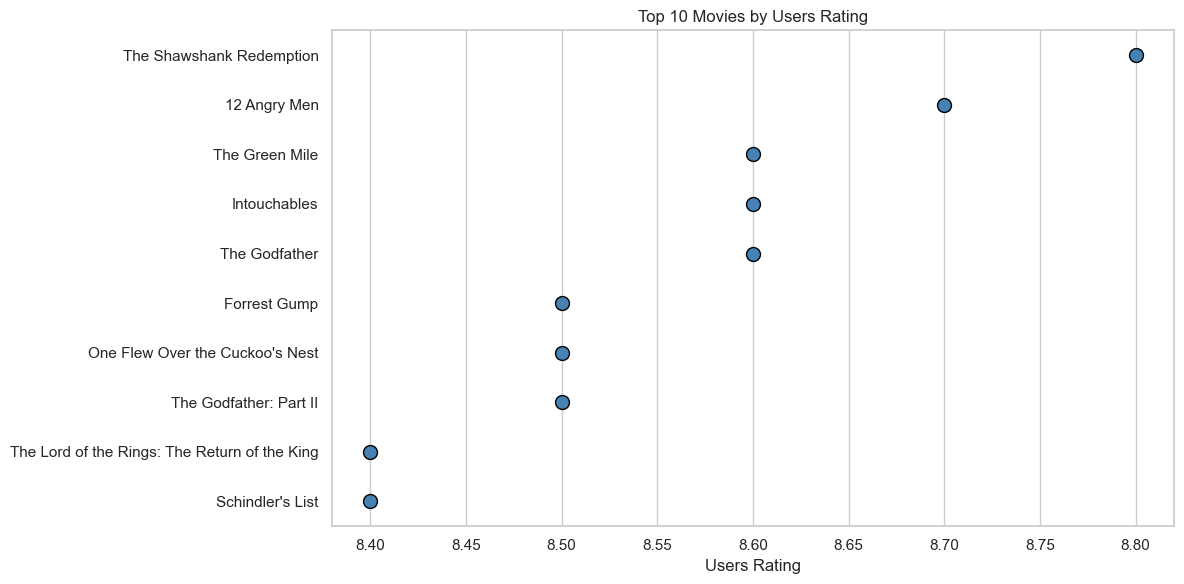

In [21]:
top10 = df.nlargest(10, 'rating_value')

plt.figure(figsize=(12, 6))
ax4 = plt.gca()

sns.stripplot(
    data=top10,
    x='rating_value',
    y='title',
    size=10,
    orient='h',
    color='steelblue',
    edgecolor='black',
    linewidth=1,
    ax=ax4
)

ax4.set_xlabel('Users Rating')
ax4.set_ylabel('')
ax4.set_title('Top 10 Movies by Users Rating')

plt.tight_layout()
plt.savefig('top10_rating.png', dpi=300, bbox_inches='tight')
plt.show()